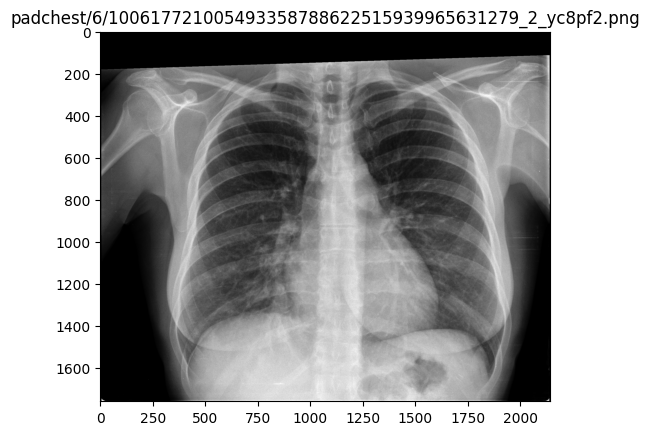

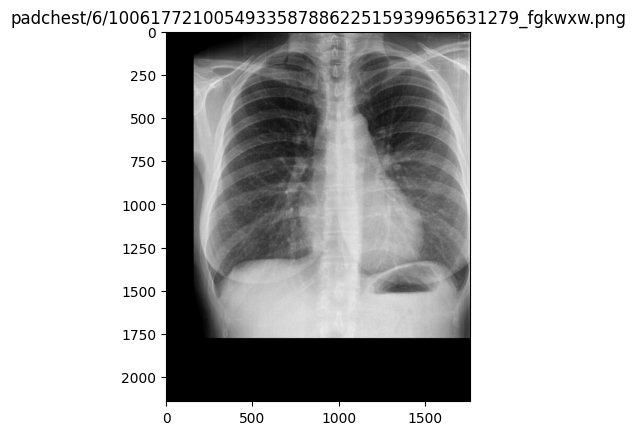

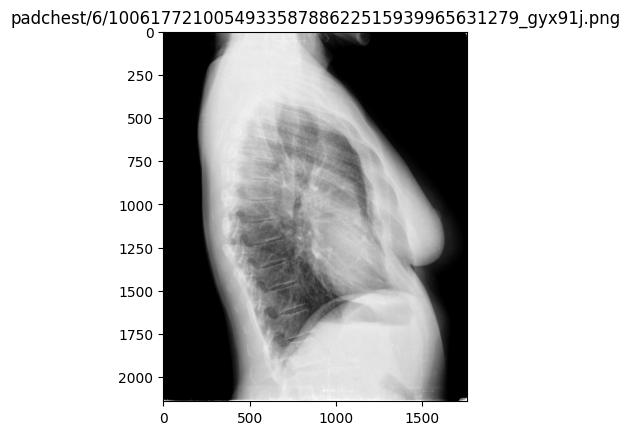

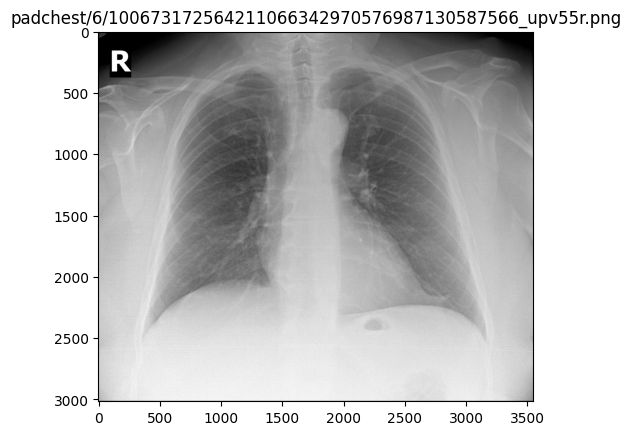

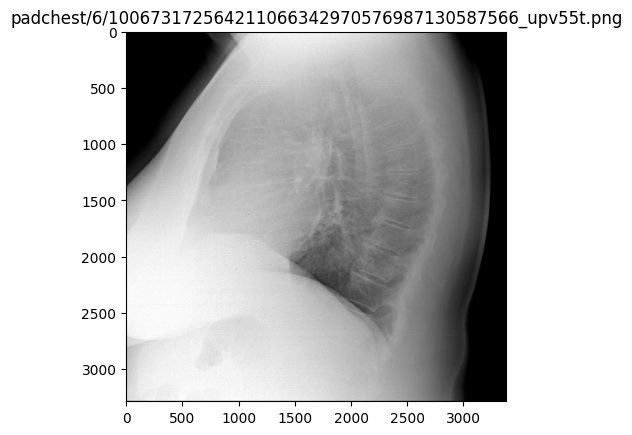

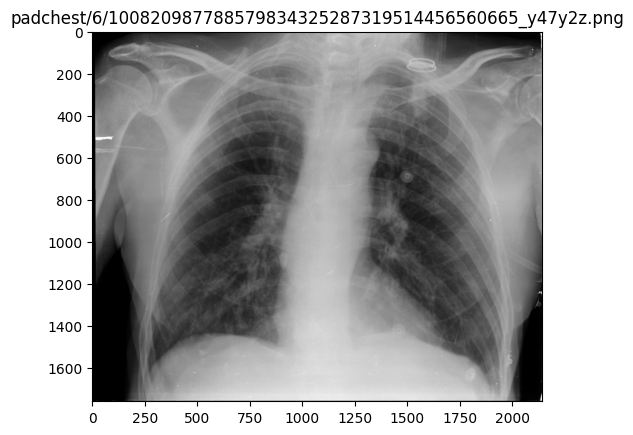

In [1]:
from google.cloud import storage
import cv2
import numpy as np
import matplotlib.pyplot as plt

client = storage.Client()
images = []

bucket = client.get_bucket("cxray_dataset")
blobs = bucket.list_blobs(prefix="padchest/6/")
for idx, blob in enumerate(blobs):
    if idx > 5:
        break
    image = blob.download_as_string()
    image = np.frombuffer(image, dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    plt.figure()
    plt.title(blob.name)
    plt.imshow(image, cmap="gray")